# Stationary Schrödinger Equation

## Probability density

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation
import mpl_toolkits.axisartist as axisartist
from math import cos, pi

In [6]:
# Set parameters
dx = 0.1
n = 224
gamma2 = 2

diag_0 = np.diag(np.ones(n), 0)
diag_p1 = np.diag(np.ones(n-1), 1)
diag_m1 = np.diag(np.ones(n-1), -1)

# Construct the matrices.
mat_A = (1/dx**2) * (diag_m1 - 2*diag_0 + diag_p1)
mat_B = (1/12) * (diag_m1 + 10*diag_0 + diag_p1)
mat_v = np.zeros((n, n))
for i in range(n):
    mat_v[i, i] = (abs((i-(n)/2)*dx))**3

the_matrix = ((-1/gamma2)*np.dot(np.linalg.inv(mat_B), mat_A) + mat_v)

In [7]:
# Calculate eigen values and eigen vectors.
E_list, wf_list = np.linalg.eig(the_matrix)
idx_sorted = np.argsort(E_list)
E_list = E_list[idx_sorted]
wf_list = wf_list[:, idx_sorted]

Text(0.5, 1.0, 'Probability Density')

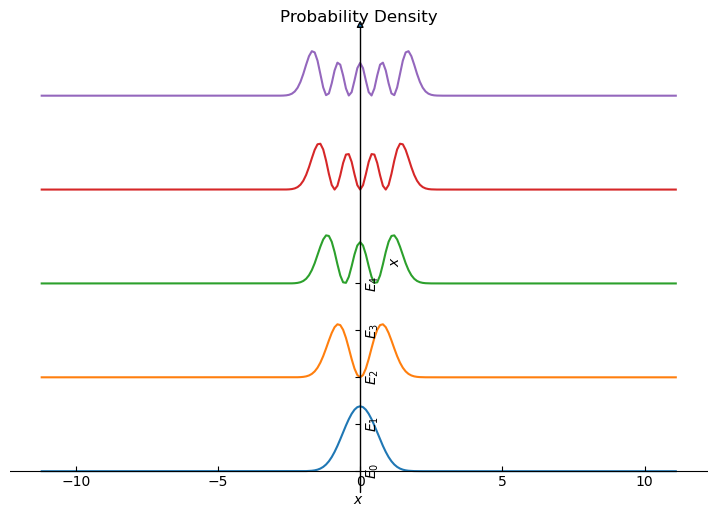

In [8]:
# Wavefunction plot
n_list = np.arange(0, n)
fig = plt.figure(figsize = (9, 6))
ax = axisartist.Subplot(fig, 111) 
fig.add_axes(ax)
for i in range(5):
    plt.plot((n_list - n/2)*dx, (wf_list[:, i])**2*20 + 2*i, label=str(i))
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi_n(x)$')
plt.yticks([0, 1, 2, 3, 4], [r'$E_0$', r'$E_1$', r'$E_2$', r'$E_3$', r'$E_4$'])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

ax.axis[:].set_visible(False)
ax.axis["y"] = ax.new_floating_axis(1, 0)
ax.axis["y"].set_axisline_style("-|>", size = 1.0)
ax.axis["x"] = ax.new_floating_axis(0, 0)
plt.title('Probability Density')

## Eig-Energy

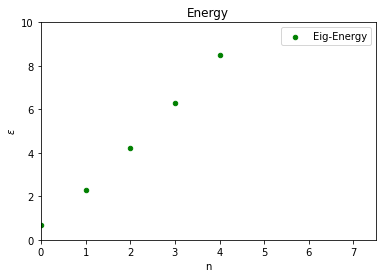

In [5]:
#Energy plot
plt.scatter(n_list, E_list, s = 20, color = 'green', label = 'Eig-Energy')
plt.xlabel('n')
plt.ylabel(r'$\epsilon$')
plt.title('Energy')
plt.xlim(0, 7.5)
plt.ylim(0, 10)
plt.legend()

In [6]:
# Show the five lowest eigen-energies.
E_list[0:5]

array([0.6748936 , 2.27650742, 4.20275923, 6.28202362, 8.49074909])

# Time-Dependent Schrödinger Equation

## Probability density

In [22]:
# Set parameters
hbar = 1
m = 1
x0 = -10
L = 40
sigma0 = 1
k0 = 7
N = 400
tau = 0.03
tn = 500
h = L/N
x_list = []
for i in range(N):
    x_list.append(i*h-L/2)

In [23]:
psi_list = np.zeros((tn,N), dtype = np.complex64)
# Set psi_0
for i in range(N):
    psi_list[0, i] = (1/np.sqrt(sigma0*np.sqrt(np.pi)))*np.exp((1j)*k0*(x_list[i] - x0))*np.exp(-0.5*np.power(x_list[i] - x0, 2)/(np.power(sigma0, 2)))

# Build the H matrix
matrix_H = np.zeros((N,N))
# First row
matrix_H[0, 0] = (-(hbar*hbar)/(2*m))*(-2/np.power(h, 2))
matrix_H[0, 1] = (-(hbar*hbar)/(2*m))*(1/np.power(h, 2))
# Last row
matrix_H[N-1, N-1] = (-(hbar*hbar)/(2*m))*(-2/np.power(h, 2))
matrix_H[N-1, N-2] = (-(hbar*hbar)/(2*m))*(1/np.power(h, 2))
# Other rows
for i in range(1, N-1):
    matrix_H[i, i] = (-(hbar*hbar)/(2*m))*(-2/np.power(h, 2))
    matrix_H[i, i+1] = (-(hbar*hbar)/(2*m))*(1/np.power(h, 2))
    matrix_H[i, i-1] = (-(hbar*hbar)/(2*m))*(1/np.power(h, 2))
    
    # Add the sinusoidal potential barrier.
    if 170<i<230:
        matrix_H[i,i] += k0**2/2*cos((pi*(i-n/2)*h)/6)

In [24]:
# The new matrix in the formula
mat_1plus_inv = np.linalg.inv(np.identity(N) + ((1j*tau)/(2*hbar))*matrix_H)
mat_1minus = np.identity(N) - ((1j*tau)/(2*hbar))*matrix_H

In [25]:
for i in range(1, tn):
    psi_list[i] = np.dot(np.dot(mat_1plus_inv, mat_1minus), psi_list[i-1].reshape(N,1)).reshape(N,)

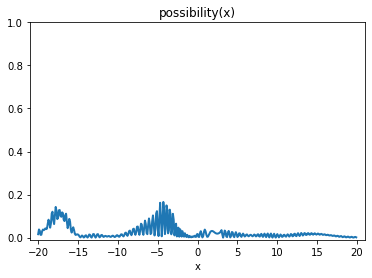

In [26]:
# Plot
fig1, ax1 = plt.subplots()
line1,line2 = ax1.plot([], [], [], lw=2)
plt.xlim(-21, 21)
plt.ylim(-0.01, 1.0)
ax1.set_xlabel('x')
ax1.set_title('possibility(x)')
def animate1(i):
    xx = x_list
    yy = abs(psi_list[i*4])**2
    yy2 = k0**2/2*cos((pi*(i-n/2)*4)/6)
    line1.set_data(xx, yy)
    line2.set_data(xx, yy2)
    return (line1, line2)
anim1 = animation.FuncAnimation(fig1, animate1, frames = 125, interval = 100, blit = True)
rc('animation', html = 'jshtml')
anim1

## Probability density is conserved

In [27]:
sum = []
for j in range(tn):
    sum.append(0)
    for i in psi_list[j]:
        sum[j] += abs(i)**2*h

In [28]:
sum

[0.9999999825424379,
 0.9999999785003494,
 0.9999999855732166,
 0.999999973988238,
 0.9999999757924153,
 0.9999999871827377,
 0.9999999667160195,
 0.999999975013075,
 1.0000000158549802,
 0.999999993596753,
 0.9999999854068358,
 1.0000000077177313,
 0.9999999894990387,
 0.9999999838394283,
 0.9999999933473064,
 0.9999999681244394,
 0.9999999591221057,
 0.9999999968968396,
 0.9999999877745942,
 0.9999999739283773,
 0.9999999744896176,
 1.000000000658461,
 0.9999999690886635,
 0.9999999898271535,
 0.9999999868391195,
 0.9999999840741829,
 0.9999999645637101,
 0.9999999745035502,
 0.9999999501187707,
 0.9999999793492562,
 0.9999999892386383,
 0.9999999815577785,
 0.9999999712658186,
 0.9999999454144881,
 0.9999999586489815,
 0.999999949895659,
 0.9999999299548729,
 0.9999999333279511,
 0.9999999257016852,
 0.9999999464298979,
 0.9999999162561372,
 0.9999999253358495,
 0.9999999256920008,
 0.9999998973781087,
 0.9999999157828133,
 0.9999999129420293,
 0.9999998901104459,
 0.999999910447864

As shown above, we can see that during time evolution, P is always equal to 1. So it is coserved.

In [2]:
np.diag(np.ones(6), 0)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [3]:
np.diag(np.ones(5), 1)

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [4]:
np.diag(np.ones(5), -1)

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])